<a href="https://colab.research.google.com/github/DoshikRahul/IIITH-AIML/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [44]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [45]:
topic1 = 'Man'
topic2 = 'Woman'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [46]:
eng1

'A man is an adult male human. Before adulthood, a male child or adolescent is referred to as a boy.\nLike most other male mammals, a man\'s genome usually inherits an X chromosome from the mother and a Y chromosome from the father. Sex differentiation of the male fetus is governed by the SRY gene on the Y chromosome. During puberty, hormones which stimulate androgen production result in the development of secondary sexual characteristics that result in even more differences between the sexes. These include greater muscle mass, greater height, the growth of facial hair and a lower body fat composition. Male anatomy is distinguished from female anatomy by the male reproductive system, which includes the testicles, sperm ducts, prostate gland and epididymides, and penis. Secondary sex characteristics include a narrower pelvis and hips, and smaller breasts and nipples.\nThroughout human history, traditional gender roles have often defined men\'s activities and opportunities. Men often fac

In [47]:
eng2

'A woman is an adult female human. Before adulthood, a female child or adolescent is referred to as a girl.\nTypically, women are of the female sex and inherit a pair of X chromosomes, one from each parent, and women with functional uteruses are capable of pregnancy and giving birth from puberty until menopause. More generally, sex differentiation of the female fetus is governed by the lack of a present, or functioning, SRY gene on either one of the respective sex chromosomes. Female anatomy is distinguished from male anatomy by the female reproductive system, which includes the ovaries, fallopian tubes, uterus, vagina, and vulva. An adult woman generally has a wider pelvis, broader hips, and larger breasts than an adult man. These characteristics facilitate childbirth and breastfeeding. Women typically have less facial and other body hair, have a higher body fat composition, and are on average shorter and less muscular than men.\nThroughout human history, traditional gender roles with

In [48]:
fr1

"La main (du latin : manus, « côté du corps ») est l’organe préhensile effecteur de primates situé à l’extrémité de l’avant-bras et relié à ce dernier par le poignet. C'est un organe capable notamment de saisir et manipuler des objets. Chez l'être humain, la main est un organe extrêmement développé et important, elle dispose d'une palette d'actions très large. Située à l'extrémité des deux membres supérieurs, chaque main possède cinq doigts qui apportent une contribution majeure au sens du toucher.\nElle est également un moyen d’expression quand elle complète la parole, ou sert d'articulateur en langue des signes.\n\n\n== Une évolution multifactorielle de la main ==\n\nLes Hominoidea sont comme les hommes capables d'utiliser les extrémités de leurs membres antérieurs pour saisir des objets, mais leurs paumes et leurs doigts sont proportionnellement bien plus longs, et leurs pouces plus courts dotés de muscles moins puissants. La main humaine possède des doigts proportionnellement plus 

In [49]:
fr2

"The Women (ou Femmes au Québec) est une comédie américaine écrite et réalisée par Diane English, sortie en 2008. Le scénario est une version actualisée de Femmes de George Cukor, datant de 1939 et lui-même adapté de la pièce de Clare Boothe Luce.\n\n\n== Synopsis ==\nMary est mariée à Stephen Haines, un homme d'affaires new-yorkais. Fidèle à son époux et mère d'une fillette, elle est entourée d'« amies », dont Sylvia Fowler, la comtesse DeLave, et Miriam Aarons, qui savent quelque chose qu'elle ignore : son mari la trompe avec Crystal Allen, une vendeuse arriviste…\n\n\n== Fiche technique ==\nTitre original : The Women\nRéalisation : Diane English\nScénario : Diane English, d'après Clare Boothe Luce\nDécors : Jane Musky\nChef opérateur : Anastas N. Michos\nMontage : Tia Nolan\nMusique : Mark Isham\nProduction : Diane English, Mick Jagger, Bill Johnson et Victoria Pearman\nSociétés de production : Inferno, Jagged Films, Shukovsky English Entertainment\nDistribution : Picturehouse\nPays

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [50]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [51]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [52]:
print(eng1)

amanisanadultmalehumanbeforeadulthoodamalechildoradolescentisreferredtoasaboylikemostothermalemammalsamansgenomeusuallyinheritsanxchromosomefromthemotherandaychromosomefromthefathersexdifferentiationofthemalefetusisgovernedbythesrygeneontheychromosomeduringpubertyhormoneswhichstimulateandrogenproductionresultinthedevelopmentofsecondarysexualcharacteristicsthatresultinevenmoredifferencesbetweenthesexestheseincludegreatermusclemassgreaterheightthegrowthoffacialhairandalowerbodyfatcompositionmaleanatomyisdistinguishedfromfemaleanatomybythemalereproductivesystemwhichincludesthetesticlesspermductsprostateglandandepididymidesandpenissecondarysexcharacteristicsincludeanarrowerpelvisandhipsandsmallerbreastsandnipplesthroughouthumanhistorytraditionalgenderroleshaveoftendefinedmensactivitiesandopportunitiesmenoftenfaceconscriptionintomilitaryserviceoraredirectedintoprofessionswithhighmortalityratesmanyreligiousdoctrinesstipulatecertainrulesformensuchasreligiouscircumcisionmenareoverrepresentedas

In [53]:
print(eng2)

awomanisanadultfemalehumanbeforeadulthoodafemalechildoradolescentisreferredtoasagirltypicallywomenareofthefemalesexandinheritapairofxchromosomesonefromeachparentandwomenwithfunctionaluterusesarecapableofpregnancyandgivingbirthfrompubertyuntilmenopausemoregenerallysexdifferentiationofthefemalefetusisgovernedbythelackofapresentorfunctioningsrygeneoneitheroneoftherespectivesexchromosomesfemaleanatomyisdistinguishedfrommaleanatomybythefemalereproductivesystemwhichincludestheovariesfallopiantubesuterusvaginaandvulvaanadultwomangenerallyhasawiderpelvisbroaderhipsandlargerbreaststhananadultmanthesecharacteristicsfacilitatechildbirthandbreastfeedingwomentypicallyhavelessfacialandotherbodyhairhaveahigherbodyfatcompositionandareonaverageshorterandlessmuscularthanmenthroughouthumanhistorytraditionalgenderroleswithinpatriarchalsocietieshaveoftendefinedandlimitedwomensactivitiesandopportunitiesresultingingenderinequalitymanyreligiousdoctrinesandlegalsystemsstipulatecertainrulesforwomenwithrestricti

In [54]:
print(fr1)

lamaindulatinmanusctducorpsestlorganeprhensileeffecteurdeprimatessitulextrmitdelavantbrasetrelicedernierparlepoignetcestunorganecapablenotammentdesaisiretmanipulerdesobjetschezltrehumainlamainestunorganeextrmementdveloppetimportantelledisposedunepalettedactionstrslargesituelextrmitdesdeuxmembressuprieurschaquemainpossdecinqdoigtsquiapportentunecontributionmajeureausensdutoucherelleestgalementunmoyendexpressionquandellecompltelaparoleousertdarticulateurenlanguedessignesunevolutionmultifactorielledelamainleshominoideasontcommeleshommescapablesdutiliserlesextrmitsdeleursmembresantrieurspoursaisirdesobjetsmaisleurspaumesetleursdoigtssontproportionnellementbienpluslongsetleurspoucespluscourtsdotsdemusclesmoinspuissantslamainhumainepossdedesdoigtsproportionnellementpluscourtsunelargeextrmitdesphalangesdistalesetdespoucesplusallongsauxphalangesrobustesdotesdemusclestrspuissantsplusieurshypothsesnonmutuellementexclusivesonttformulesquantlanaturedelavantageadaptatiffondamentalacquisauniveaudela

In [55]:
print(fr2)

thewomenoufemmesauqubecestunecomdieamricainecriteetralisepardianeenglishsortieenlescnarioestuneversionactualisedefemmesdegeorgecukordatantdeetluimmeadaptdelapicedeclareboothelucesynopsismaryestmariestephenhainesunhommedaffairesnewyorkaisfidlesonpouxetmredunefilletteelleestentouredamiesdontsylviafowlerlacomtessedelaveetmiriamaaronsquisaventquelquechosequelleignoresonmarilatrompeaveccrystalallenunevendeusearrivistefichetechniquetitreoriginalthewomenralisationdianeenglishscnariodianeenglishdaprsclareboothelucedcorsjanemuskychefoprateuranastasnmichosmontagetianolanmusiquemarkishamproductiondianeenglishmickjaggerbilljohnsonetvictoriapearmansocitsdeproductioninfernojaggedfilmsshukovskyenglishentertainmentdistributionpicturehousepaystatsunisgenrecomdiedureminutesdatesdesortietatsunisseptembrefrancejuindistributionmegryanvqnataliehamelroymaryhainesannettebeningvqmarieandrecorneillesylviefowlerevamendesvqisabelleleyrollescrystalallendebramessingvqmarikalhoumeauediecohenjadapinkettsmithvqcamille

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [56]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

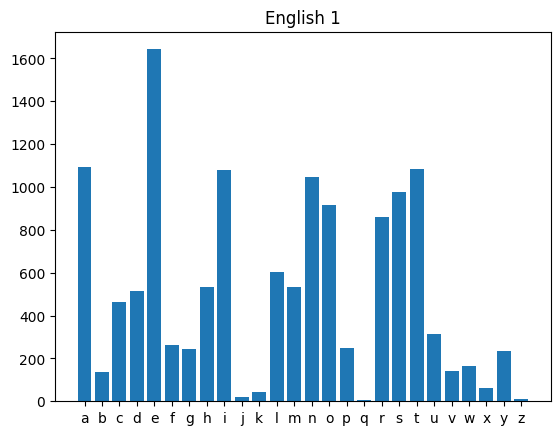

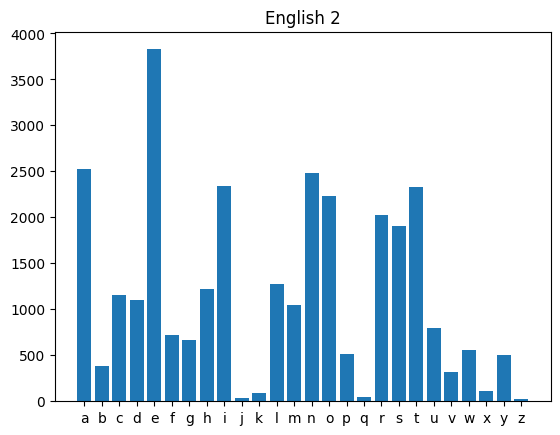

In [57]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

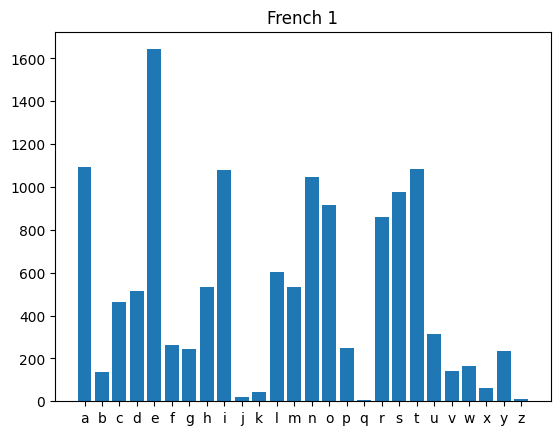

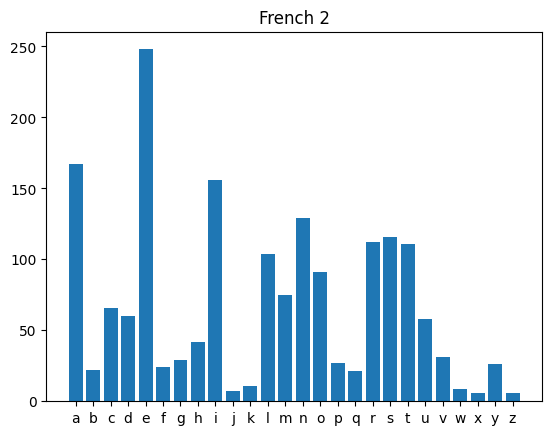

In [58]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

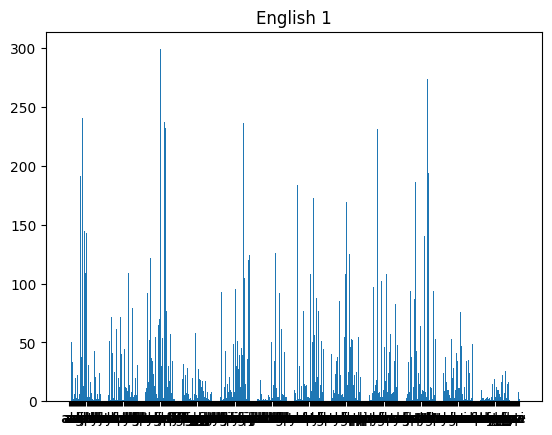

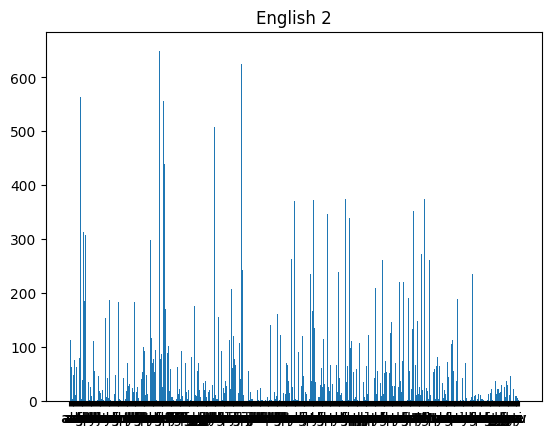

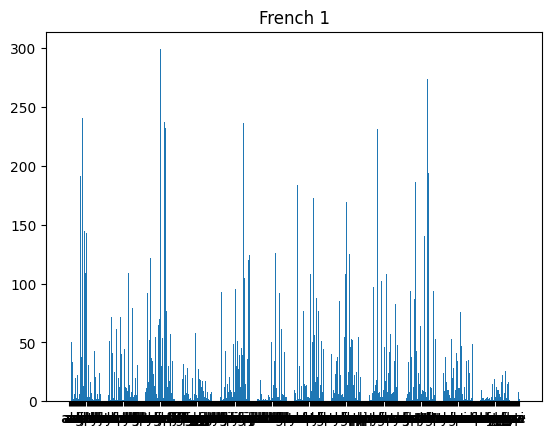

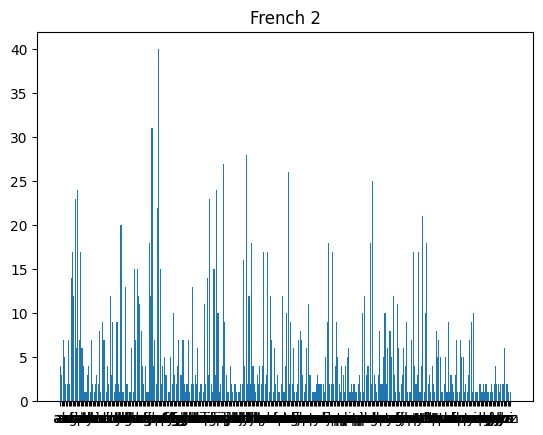

In [59]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [60]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

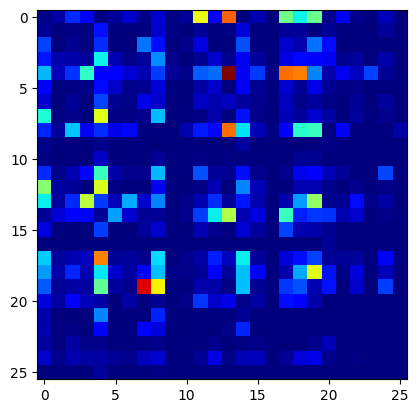

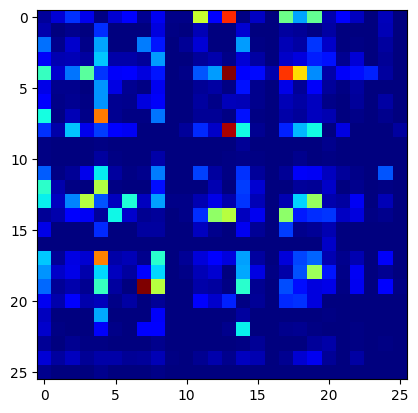

In [61]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

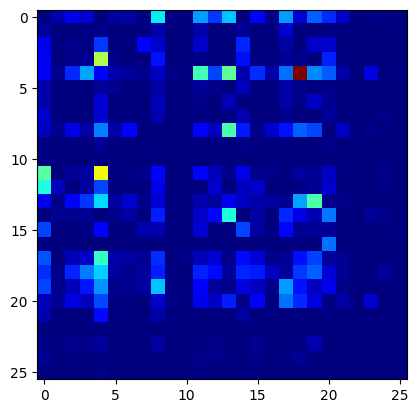

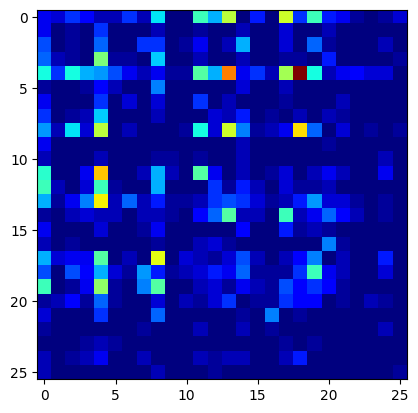

In [62]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [63]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [64]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('e', 'n') : 299.0
('t', 'h') : 274.0
('a', 'n') : 241.0
('e', 'r') : 237.0
('i', 'n') : 236.0
('e', 's') : 232.0
('r', 'e') : 231.0
('t', 'i') : 194.0
('a', 'l') : 191.0
('s', 't') : 186.0

English 2:
('t', 'h') : 652.0
('e', 'n') : 648.0
('i', 'n') : 624.0
('a', 'n') : 564.0
('e', 'r') : 556.0
('h', 'e') : 508.0
('r', 'e') : 503.0
('e', 's') : 439.0
('a', 'l') : 387.0
('o', 'n') : 374.0

French 1:
('e', 's') : 865.0
('l', 'e') : 556.0
('d', 'e') : 484.0
('e', 'n') : 400.0
('l', 'a') : 395.0
('n', 't') : 383.0
('i', 'n') : 381.0
('e', 'l') : 372.0
('r', 'e') : 357.0
('m', 'a') : 333.0

French 2:
('e', 's') : 40.0
('e', 'n') : 31.0
('l', 'e') : 28.0
('i', 's') : 27.0
('n', 'e') : 26.0
('r', 'i') : 25.0
('i', 'n') : 24.0
('a', 'r') : 24.0
('i', 'e') : 23.0
('a', 'n') : 23.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [65]:
!pip install wikipedia

In [66]:
# Import the wikipedia library
import wikipedia

topic1 = 'Mann'
topic2 = 'Frau'

wikipedia.set_lang('de') # 'de' is the language code for German

de1 = wikipedia.page(topic1).content
de2 = wikipedia.page(topic2).content

In [67]:
topic1 = 'Uomo'
topic2 = 'Donna'

wikipedia.set_lang('it') # 'it' is the language code for Italian

it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

In [68]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [69]:
de1 = cleanup(de1)
de2 = cleanup(de2)
it1 = cleanup(it1)
it2 = cleanup(it2)

In [70]:
print(de1)
print(de2)
print(it1)
print(it2)

mannbezeichneteinenmnnlichenerwachsenenmenschenundbeziehtsichaufdasbiologischegeschlechtimmodernensprachgebrauchauchaufdiegeschlechtsidentittmnnlichekinderundjugendlichewerdenalsjungenbezeichnetauchknabenbubendiehflicheanredefreinenmannlautetimdeutschenherrgefolgtvomfamiliennamendesangesprochenenentsprechendwirdineinigensportartenzwischendamenundherrensportunterschiedendieentwicklungdesbiologischengeschlechtsistgenetischbedingtdurcheinchromosomenpaarxywobeivorallemdurchdasychromosomsowiedasmnnlichesexualhormontestosterondieentwicklungmnnlicherprimrerundsekundrergeschlechtsmerkmalegesteuertwirdmnnerproduzierenspermienmitdeneneizellenbefruchtetwerdenknnensiesindimgegensatzzufrauenmittypischergenetischerentwicklunginkeinerphaseihreslebensinderlageschwangerzuwerdenzudemgibtestransgendermnnerderengeschlechtsidentittvondemihnennachdergeburtbestimmtengeschlechtabweichtsowieintergeschlechtlichepersonenmitgeschlechtsmerkmalendienichtmitdergeschlechtsordnendenunterscheidunginmannoderfraubereinst

In [82]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  # Check if the ngram Counter is empty
  if not ngram:
    print("No data to plot.") # Or you can simply return without plotting
    return

  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

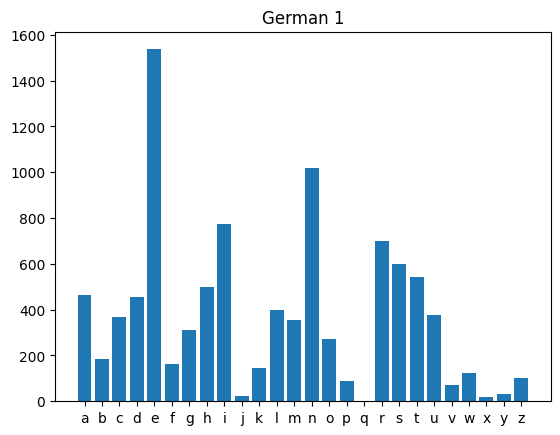

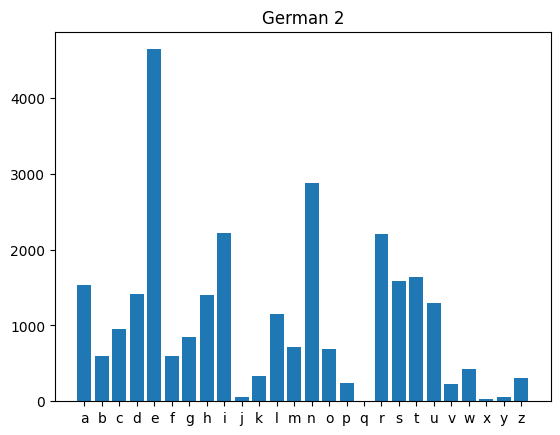

In [90]:
a = Counter(ngrams(de1,1))
plothistogram(a)
plt.title('German 1')
plt.show()
b = Counter(ngrams(de2,1))
plothistogram(b)
plt.title('German 2')

plt.show()


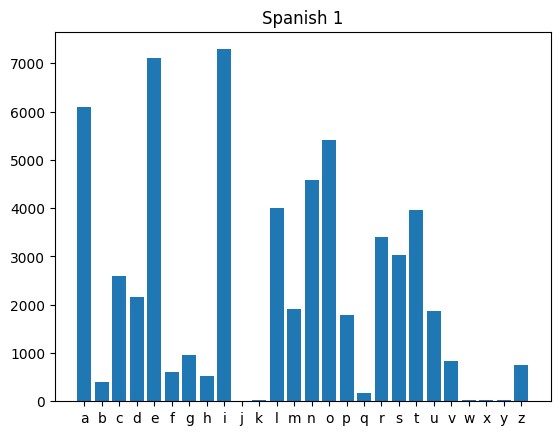

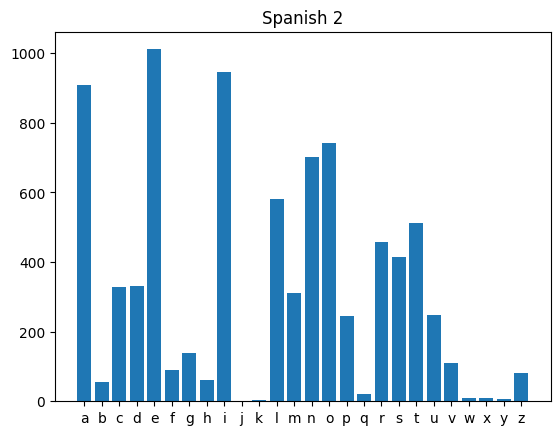

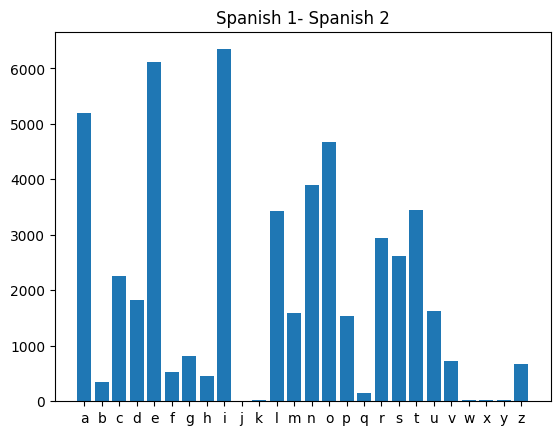

In [92]:
unigram_it1 = Counter(ngrams(it1,1))
plothistogram(unigram_it1)
plt.title('Spanish 1')
plt.show()
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_it2)
plt.title('Spanish 2')
plt.show()

residual_1_2_it = unigram_it1 - unigram_it2
plothistogram(residual_1_2_it)
plt.title('Spanish 1- Spanish 2')
plt.show()


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [95]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [96]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

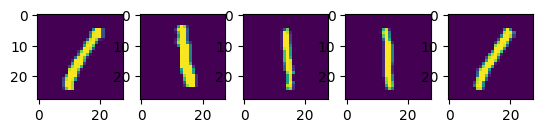

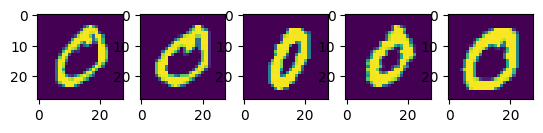

In [99]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [100]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

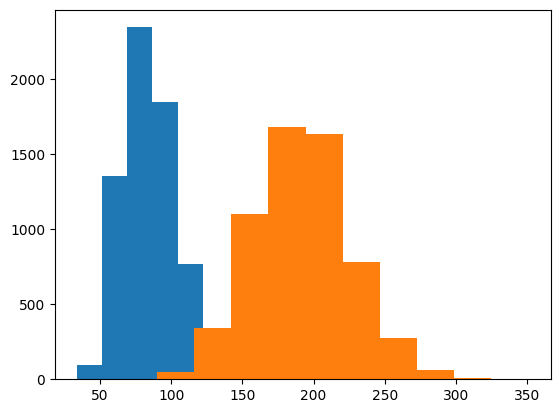

In [102]:
plt.hist(sum1, alpha=1.0);
plt.hist(sum0, alpha=1.0);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [108]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

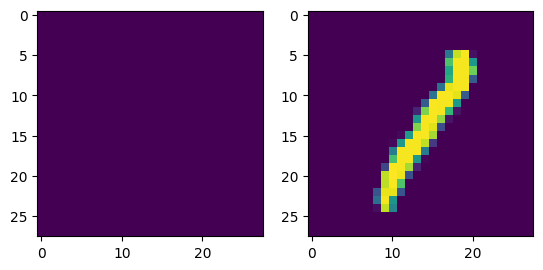

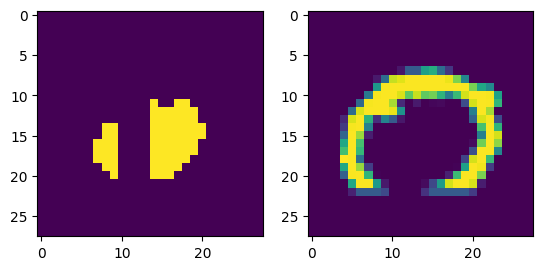

In [109]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

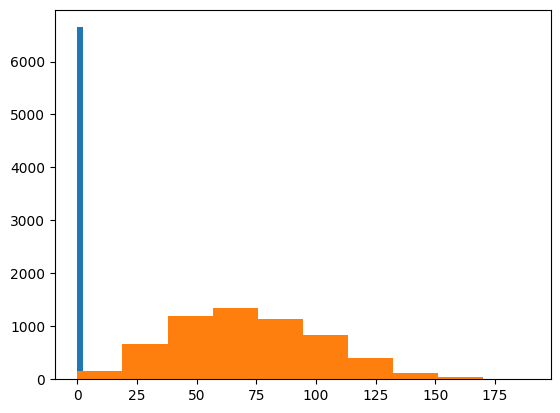

In [111]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=1.0);
plt.hist(hole0, alpha=1.0);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [112]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

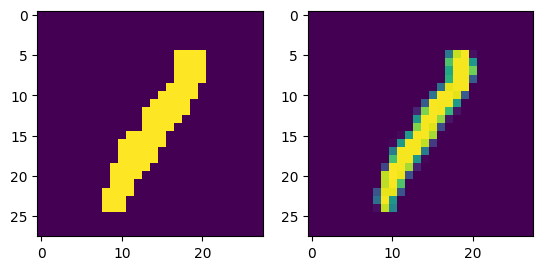

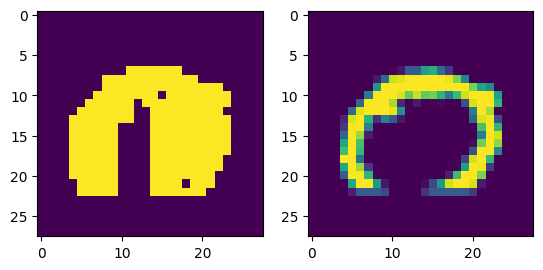

In [113]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

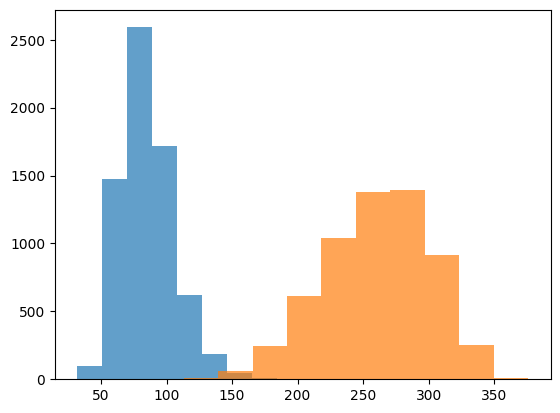

In [114]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [115]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

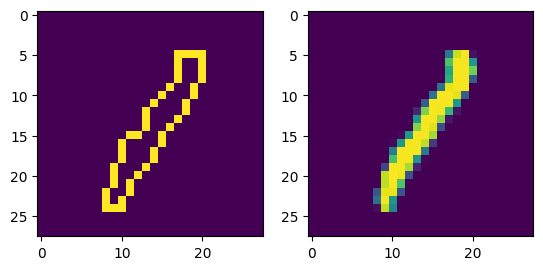

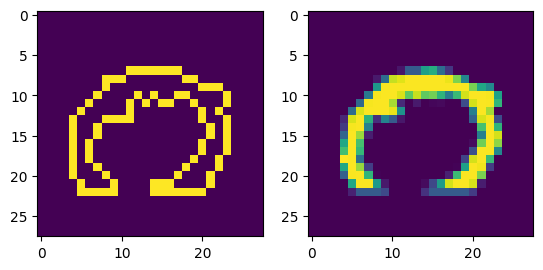

In [116]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

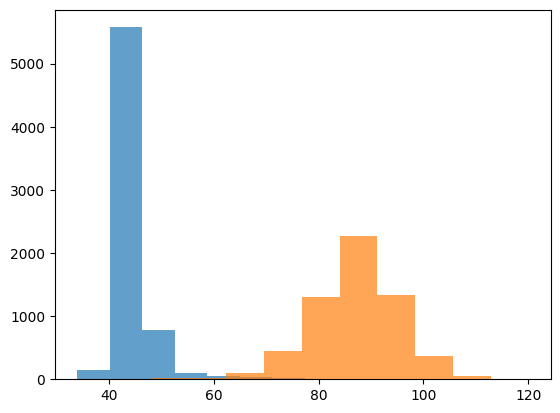

In [117]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

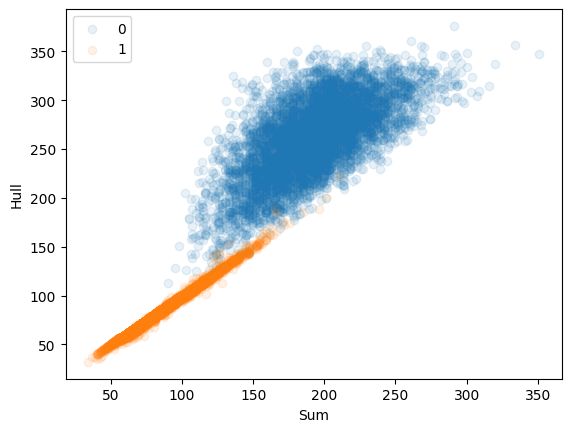

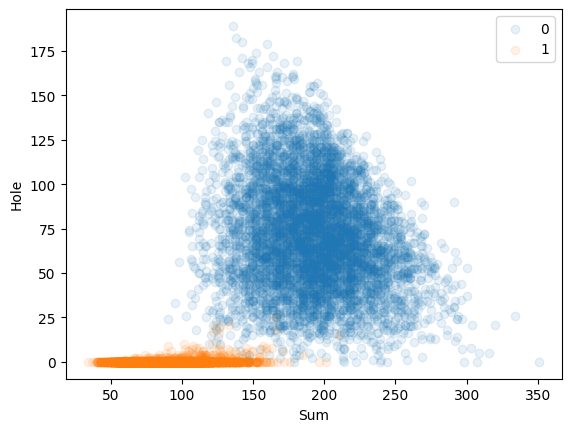

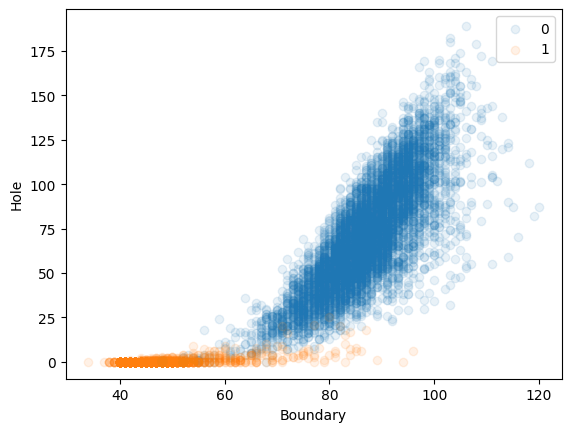

In [118]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [119]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

Which is the best combination of features? It seems like the combination of "Hole" and "Boundary" pixels, or "Sum" and "Hole" pixels, looks pretty good based on those scatter plots. The '0's and '1's appear to be nicely separated when we look at those pairs of features together.

How would you test or visualize four or more features? Visualizing more than three is tricky. We could try looking at pairs of features, or use techniques that squish the data down to fewer dimensions so we can still see something on a plot. We could also use some statistical tools to see how well the features separate the classes without actually plotting everything at once.

Can you come up with your own features? Absolutely! We could think about things like how wide or tall the digit is, how spread out the black pixels are, or how many separate blobs of black pixels there are. We could also try summing up the pixels along the edges or in different sections of the image.

Will these features work for different classes other than 0 and 1? Some of these features might work for other digits, especially the "Hole" feature for digits with holes like 0, 4, 6, 8, and 9. But they probably won't be as good at telling every pair of digits apart.

What will happen if we take more that two classes at a time? Things get more complicated! The features that separated 0 and 1 so well might not be enough to tell the difference between 0, 1, and, say, 2. We'd likely need a combination of features to handle the overlaps, and we'd probably rely on a classification model to sort them out.